In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install tensorflow -q
!pip install librosa -q

In [4]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio

import os
import sys
import gc

import librosa
import librosa.display

# Data Reading

In [5]:
cremad_path = '/content/drive/MyDrive/USML_final_project/crema_d'
tess_path = '/content/drive/MyDrive/USML_final_project/TESS'
savee_path = '/content/drive/MyDrive/USML_final_project/SAVEE' 

In [6]:
# Reading the data
cremad_files = os.listdir(cremad_path)
print(cremad_files[0:5])

emotions_lst = []
path_lst = []

for i in cremad_files:
    path_lst.append(cremad_path + '/'+i)
    emotion_val=i.split('_')

    if emotion_val[2] == 'SAD':
        emotions_lst.append('sad')
    
    elif emotion_val[2] == 'ANG':
        emotions_lst.append('angry')
    
    elif emotion_val[2] == 'DIS':
        emotions_lst.append('disgust')
    
    elif emotion_val[2] == 'FEA':
        emotions_lst.append('fear')
    
    elif emotion_val[2] == 'HAP':
        emotions_lst.append('happy')
    
    elif emotion_val[2] == 'NEU':
        emotions_lst.append('neutral')
    
    else:
        emotions_lst.append('Unknown')

['1079_WSI_HAP_XX.wav', '1079_TSI_ANG_XX.wav', '1079_TSI_SAD_XX.wav', '1079_WSI_DIS_XX.wav', '1079_WSI_FEA_XX.wav']


In [7]:
cremad_df = pd.DataFrame(list(zip(path_lst, emotions_lst)), columns=['Path', 'Emotion'])

In [8]:
savee_directory_list = os.listdir(savee_path)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(savee_path + '/' + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotion'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([path_df, emotion_df], axis=1)
Savee_df.head()

,Path,Emotion
0,/content/drive/MyDrive/USML_final_project/SAVE...,angry
1,/content/drive/MyDrive/USML_final_project/SAVE...,angry
2,/content/drive/MyDrive/USML_final_project/SAVE...,angry
3,/content/drive/MyDrive/USML_final_project/SAVE...,angry
4,/content/drive/MyDrive/USML_final_project/SAVE...,angry


In [9]:
tess_directory_list = os.listdir(tess_path)

file_emotion = []
file_path = []
print(tess_path)
for dir in tess_directory_list[0:3]:
    #print(dir)
    directories = os.listdir(tess_path + '/' + dir)
    #print(directories)

    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')
        if len(part) == 3:
          part = part[2]
          if part=='ps':
            file_emotion.append('surprise')
          else:
            file_emotion.append(part)
        file_path.append(tess_path + '/' + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotion'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([path_df, emotion_df], axis=1)
Tess_df.head()

/content/drive/MyDrive/USML_final_project/TESS


,Path,Emotion
0,/content/drive/MyDrive/USML_final_project/TESS...,disgust
1,/content/drive/MyDrive/USML_final_project/TESS...,disgust
2,/content/drive/MyDrive/USML_final_project/TESS...,disgust
3,/content/drive/MyDrive/USML_final_project/TESS...,disgust
4,/content/drive/MyDrive/USML_final_project/TESS...,disgust


In [10]:
final_df = pd.concat([cremad_df, Savee_df])
final_df = pd.concat([final_df, Tess_df])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total number of emotions')

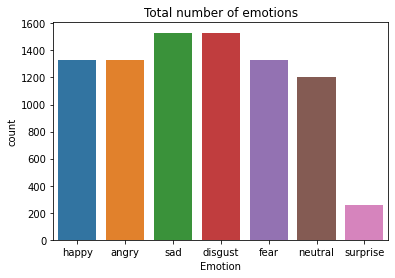

In [11]:
sns.countplot(final_df['Emotion'])
plt.title('Total number of emotions')

In [ ]:
# creating functions to visualize the wave of audio
def create_waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 5))
    plt.title(f'Waveplot for audio with {emotion} emotion', size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 5))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

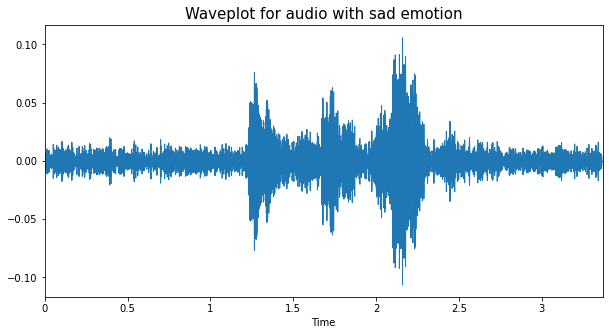

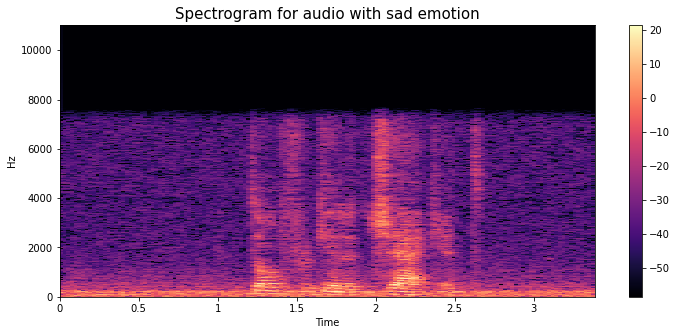

In [ ]:
emotion='sad'
path = np.array(final_df.Path[final_df.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

# Data Augmentation

In [ ]:
# data augmentation with noise, and stretch
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

# taking any example and checking for techniques.
path = np.array(cremad_df.Path)[1]
data, sample_rate = librosa.load(path)

In [ ]:
# Extracting features

def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

In [ ]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

# Feature Extraction

In [ ]:
%%time
X, Y = [], []
count = 0
for path, emotion in zip(final_df.Path, final_df.Emotion):
    feature = get_features(path)
    #print(count)
    count += 1
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

/usr/local/lib/python3.8/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


CPU times: user 54min 29s, sys: 39min 21s, total: 1h 33min 50s
Wall time: 58min 14s


In [ ]:
final_df.Path

0      /content/drive/MyDrive/USML_final_project/crem...
1      /content/drive/MyDrive/USML_final_project/crem...
2      /content/drive/MyDrive/USML_final_project/crem...
3      /content/drive/MyDrive/USML_final_project/crem...
4      /content/drive/MyDrive/USML_final_project/crem...
                             ...                        
595    /content/drive/MyDrive/USML_final_project/TESS...
596    /content/drive/MyDrive/USML_final_project/TESS...
597    /content/drive/MyDrive/USML_final_project/TESS...
598    /content/drive/MyDrive/USML_final_project/TESS...
599    /content/drive/MyDrive/USML_final_project/TESS...
Name: Path, Length: 8522, dtype: object

%%time
X, Y = [], []
count = 0
for path, emotion in zip(final_df.Path, final_df.Emotion):
    feature = extract_features(path)
    #print(count)
    count += 1
    X.append(feature)
    Y.append(emotion)

In [ ]:
Features = pd.DataFrame(X)
Features['Emotion'] = Y

In [ ]:
Features.shape

(25566, 163)

In [ ]:
nulls = []
for i in range(len(Features.columns)-1):
  if Features[i].isna().sum() > 0:
    nulls.append(i)

In [ ]:
len(nulls)

0

In [ ]:
Labels = Features['Emotion']

In [ ]:
sum(Features.nunique() == 1)

0

In [ ]:
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,Emotion
0,0.103149,0.646820,0.553774,0.428459,0.396023,0.427617,0.469151,0.474649,0.483870,0.534888,...,0.000002,0.000002,0.000002,0.000002,0.000001,0.000001,0.000001,0.000001,0.000001,happy
1,0.272753,0.793239,0.751165,0.650540,0.610080,0.621301,0.618765,0.556584,0.560516,0.580986,...,0.007715,0.008040,0.007730,0.007560,0.007755,0.007561,0.007625,0.007330,0.007575,happy
2,0.116546,0.602004,0.716895,0.545718,0.421082,0.401227,0.444282,0.479256,0.456141,0.467201,...,0.000003,0.000003,0.000002,0.000002,0.000003,0.000005,0.000010,0.000013,0.000013,happy
3,0.161685,0.607867,0.607035,0.536918,0.525360,0.492009,0.510087,0.546449,0.593302,0.608940,...,0.000013,0.000012,0.000010,0.000009,0.000009,0.000008,0.000008,0.000007,0.000007,angry
4,0.327218,0.724648,0.725036,0.680657,0.707147,0.675237,0.635063,0.606967,0.644423,0.661463,...,0.009036,0.009029,0.009163,0.009624,0.009423,0.009265,0.009275,0.008739,0.009597,angry


# Saving to CSV

In [ ]:
Features.to_csv('/content/drive/MyDrive/USML_final_project/Final/features_all_methods1.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,Emotion
0,0.103149,0.646820,0.553774,0.428459,0.396023,0.427617,0.469151,0.474649,0.483870,0.534888,...,0.000002,0.000002,0.000002,0.000002,0.000001,0.000001,0.000001,0.000001,0.000001,happy
1,0.272753,0.793239,0.751165,0.650540,0.610080,0.621301,0.618765,0.556584,0.560516,0.580986,...,0.007715,0.008040,0.007730,0.007560,0.007755,0.007561,0.007625,0.007330,0.007575,happy
2,0.116546,0.602004,0.716895,0.545718,0.421082,0.401227,0.444282,0.479256,0.456141,0.467201,...,0.000003,0.000003,0.000002,0.000002,0.000003,0.000005,0.000010,0.000013,0.000013,happy
3,0.161685,0.607867,0.607035,0.536918,0.525360,0.492009,0.510087,0.546449,0.593302,0.608940,...,0.000013,0.000012,0.000010,0.000009,0.000009,0.000008,0.000008,0.000007,0.000007,angry
4,0.327218,0.724648,0.725036,0.680657,0.707147,0.675237,0.635063,0.606967,0.644423,0.661463,...,0.009036,0.009029,0.009163,0.009624,0.009423,0.009265,0.009275,0.008739,0.009597,angry
